In [2]:
import numpy as np
from floris.tools import FlorisInterface
import matplotlib.pyplot as plt

In [3]:
# 1. Load an input file
fi = FlorisInterface("../../WindEnergyDemo/floris/examples/inputs/gch.yaml")

fi.floris.solver 

# 2. Modify the inputs with a more complex wind turbine layout
D = 126.0  # Design the layout based on turbine diameter
x = [1200,0,800,0]
y = [0,400,800,1200]
wind_directions = [270]
wind_speeds = [10]

'''
alternative way to set up multiple turbines

# Set up a square 25 turbine layout
Nx = 5  # Number of turbines per row and per column
Ny = 5
D = 126.0

X, Y = np.meshgrid(
    2 * D * np.arange(0, Nx, 1),
    2 * D * np.arange(0, Ny, 1),
)
X = X.flatten()
Y = Y.flatten()
print(f"Number of turbines = {len(X)}")

wind_directions = [0]
wind_speeds = [10.0]

# Pass the new data to FlorisInterface
fi.reinitialize(
    layout_x=X,
    layout_y=Y,
    wind_directions=wind_directions,
    wind_speeds=wind_speeds
)

fi.calculate_wake()
'''

'\nalternative way to set up multiple turbines\n\n# Set up a square 25 turbine layout\nNx = 5  # Number of turbines per row and per column\nNy = 5\nD = 126.0\n\nX, Y = np.meshgrid(\n    2 * D * np.arange(0, Nx, 1),\n    2 * D * np.arange(0, Ny, 1),\n)\nX = X.flatten()\nY = Y.flatten()\nprint(f"Number of turbines = {len(X)}")\n\nwind_directions = [0]\nwind_speeds = [10.0]\n\n# Pass the new data to FlorisInterface\nfi.reinitialize(\n    layout_x=X,\n    layout_y=Y,\n    wind_directions=wind_directions,\n    wind_speeds=wind_speeds\n)\n\nfi.calculate_wake()\n'

In [4]:
# Pass the new data to FlorisInterface
# Pass the new data to FlorisInterface
fi.reinitialize(
    layout_x=x,
    layout_y=y,
    wind_directions=wind_directions,
    wind_speeds=wind_speeds
)

# 3. Calculate the velocities at each turbine for all atmospheric conditions
# All turbines have 0 degrees yaw
fi.calculate_wake()

In [5]:
x, y = fi.get_turbine_layout()

print("     x       y")
for _x, _y in zip(x, y):
    print(f"{_x:6.1f}, {_y:6.1f}")

     x       y
1200.0,    0.0
   0.0,  400.0
 800.0,  800.0
   0.0, 1200.0


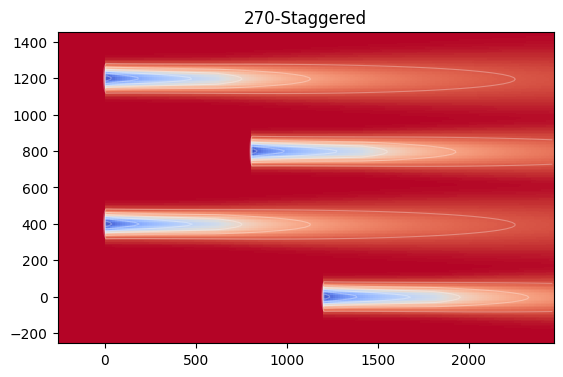

In [6]:
from floris.tools.visualization import visualize_cut_plane
horizontal_plane = fi.calculate_horizontal_plane(height=90.0)
visualize_cut_plane(horizontal_plane,title='270-Staggered')

In [7]:
wind_directions = [270.0,180.0]
wind_speeds = [10.0]

# Pass the new data to FlorisInterface
fi.reinitialize(
    layout_x=x,
    layout_y=y,
    wind_directions=wind_directions,
    wind_speeds=wind_speeds
)

yaw_angles = np.zeros( (2, 1, 4) )  # Construct the yaw array with dimensions for two wind directions, one wind speed, and four turbines
yaw_angles[0, :, 0] = 25            # At 270 degrees, yaw the first turbine 25 degrees
yaw_angles[0, :, 1] = 25            # At 270 degrees, yaw the second turbine 25 degrees
yaw_angles[1, :, 0] = 10           # At 265 degrees, yaw the first turbine -25 degrees
yaw_angles[1, :, 1] = 10           # At 265 degrees, yaw the second turbine -25 degrees

# 6. Calculate the velocities at each turbine for all atmospheric conditions with the new yaw settings
fi.calculate_wake(yaw_angles=yaw_angles)


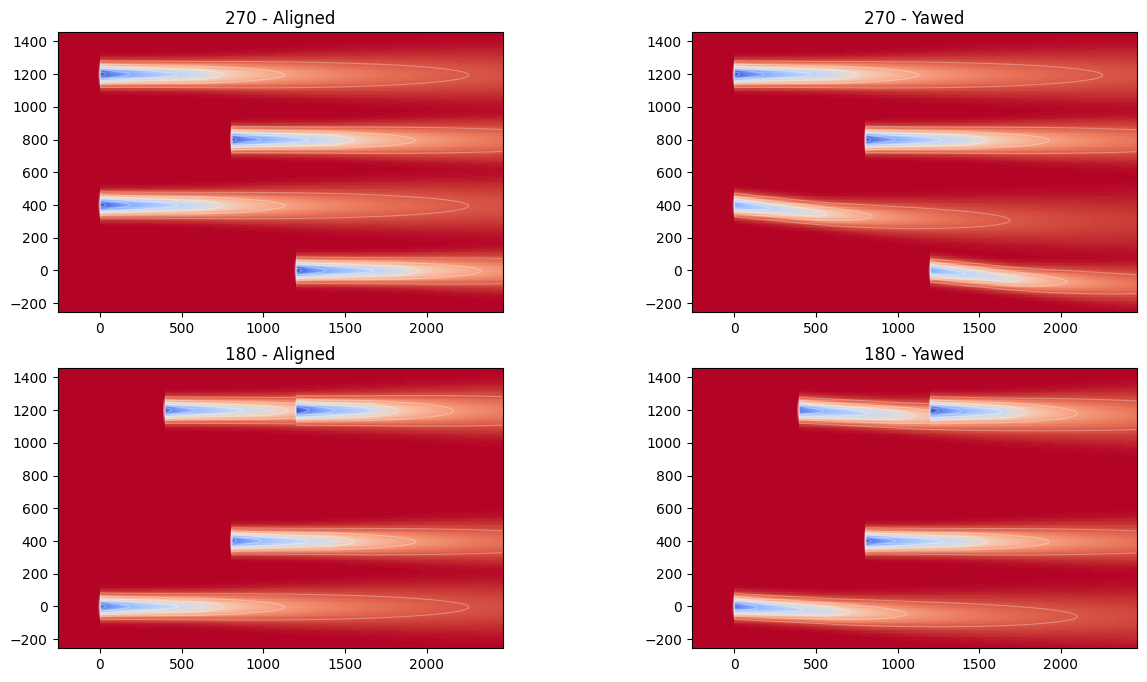

In [8]:
fig, axarr = plt.subplots(2, 2, figsize=(15,8))

horizontal_plane = fi.calculate_horizontal_plane(wd=[wind_directions[0]], height=90.0)
visualize_cut_plane(horizontal_plane, ax=axarr[0,0], title="270 - Aligned")

horizontal_plane = fi.calculate_horizontal_plane(wd=[wind_directions[0]], yaw_angles=yaw_angles[0:1,0:1] , height=90.0)
visualize_cut_plane(horizontal_plane, ax=axarr[0,1], title="270 - Yawed")

horizontal_plane = fi.calculate_horizontal_plane(wd=[wind_directions[1]], height=90.0)
visualize_cut_plane(horizontal_plane, ax=axarr[1,0], title="180 - Aligned")

horizontal_plane = fi.calculate_horizontal_plane(wd=[wind_directions[1]], yaw_angles=yaw_angles[1:2,0:1] , height=90.0)
visualize_cut_plane(horizontal_plane, ax=axarr[1,1], title="180 - Yawed")

In [9]:
powers = fi.get_turbine_powers() / 1000.0  # calculated in Watts, so convert to kW

print("Dimensions of `powers`")
print( np.shape(powers) )

N_TURBINES = 4

print()
print("Turbine powers for 10 m/s")
for i in range(2):
    print(f"Wind direction {i}")
    for j in range(N_TURBINES):
        print(f"  Turbine {j} - {powers[i, 0, j]:.2f} kW")
    print()

# we have two different wind directions, so this will compute power in the two different configurations specified. 

print("Turbine powers for all turbines at all wind conditions")
print(powers)

Dimensions of `powers`
(2, 1, 4)

Turbine powers for 10 m/s
Wind direction 0
  Turbine 0 - 2748.07 kW
  Turbine 1 - 2748.07 kW
  Turbine 2 - 3298.07 kW
  Turbine 3 - 3298.07 kW

Wind direction 1
  Turbine 0 - 3208.46 kW
  Turbine 1 - 3208.46 kW
  Turbine 2 - 3298.07 kW
  Turbine 3 - 1397.11 kW

Turbine powers for all turbines at all wind conditions
[[[2748.07088953 2748.07238682 3298.06715556 3298.06715556]]

 [[3208.46408543 3208.46408543 3298.06715556 1397.1116538 ]]]


In [10]:
# We need to separate the above array for the two different wind directions in order to plot them - I've written the code for you here. 
# You shouldn't have to change this, other than adding a third wind direction. 
power_dir1=[]
for i in range(0,len(powers[0][0])):
    power_dir1.append(powers[0][0][i])

power_dir2=[]
for i in range(0,len(powers[1][0])):
    power_dir2.append(powers[1][0][i])

Text(0.5, 1.0, 'Power Output as a Function of Turbine # at 10 m/s')

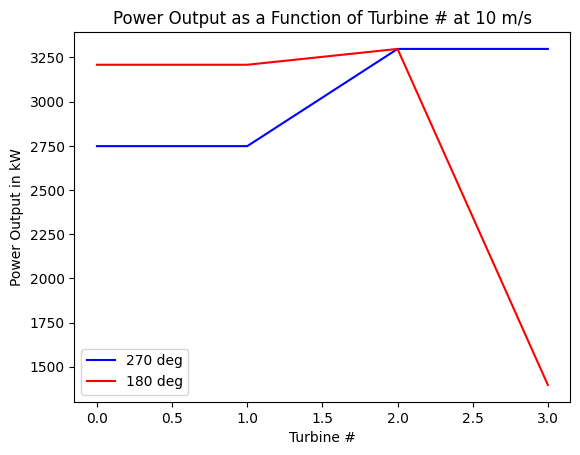

In [11]:
plt.figure()
plt.plot(power_dir1,'b',label='270 deg')
plt.plot(power_dir2,'r',label='180 deg')
plt.xlabel('Turbine #')
plt.ylabel('Power Output in kW')
plt.legend()
plt.title('Power Output as a Function of Turbine # at 10 m/s')